# Laptop Price Prediction

## Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.

## Data Description
The dataset has already been randomly divided into the training, validation and test sets. It is stored in 3 files: train_dataset.json, val_dataset.json and test_dataset.json respectively. Each file is JSON saved in orient=’columns’ format.

### Example how to load the data:

### Practicalities

Prepare a model in Jupyter Notebook using Python. Only use the training data for training the model and check the model's performance on unseen data using the test dataset to make sure it does not overfit.


Ensure that the notebook reflects your thought process. It’s better to show all the approaches, not only the final one (e.g. if you tested several 
m\odels, you can show all of them). The path to obtaining the final model should be clearly shown.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1HYUkqZVEXi-691h9I2j_uaYxedJa-f-S?usp=sharing"> Click here </a>

## Import necessary Libraries :

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## load the dataset :

In [2]:
# load the train dataset
train = pd.read_json('train_dataset.json')
train.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [3]:
# load the test dataset
test = pd.read_json('test_dataset.json')
test.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
5124,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
9595,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
4926,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
2607,integrated graphics,"[lan 10/100/1000 mbps, nfc (near field communi...",3200 x 1800,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
1185,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


## Data Preprocessing

In [4]:
# check the shape of the datasets
train.shape, test.shape

((4711, 17), (1571, 17))

In [5]:
# check the info for train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4711 entries, 7233 to 6037
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       4417 non-null   object 
 1   communications          4261 non-null   object 
 2   resolution (px)         4361 non-null   object 
 3   CPU cores               4711 non-null   object 
 4   RAM size                4457 non-null   object 
 5   operating system        4335 non-null   object 
 6   drive type              4454 non-null   object 
 7   input devices           4321 non-null   object 
 8   multimedia              4310 non-null   object 
 9   RAM type                4212 non-null   object 
 10  CPU clock speed (GHz)   4181 non-null   float64
 11  CPU model               4389 non-null   object 
 12  state                   4711 non-null   object 
 13  drive memory size (GB)  4439 non-null   float64
 14  warranty                4711 non-null

In [6]:
# check the info for test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 5124 to 1371
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       1469 non-null   object 
 1   communications          1401 non-null   object 
 2   resolution (px)         1442 non-null   object 
 3   CPU cores               1571 non-null   object 
 4   RAM size                1468 non-null   object 
 5   operating system        1431 non-null   object 
 6   drive type              1479 non-null   object 
 7   input devices           1428 non-null   object 
 8   multimedia              1415 non-null   object 
 9   RAM type                1383 non-null   object 
 10  CPU clock speed (GHz)   1361 non-null   float64
 11  CPU model               1464 non-null   object 
 12  state                   1571 non-null   object 
 13  drive memory size (GB)  1466 non-null   float64
 14  warranty                1571 non-null

In [7]:
# check the unique columns
train['graphic card type'].unique()

array(['dedicated graphics', None, 'integrated graphics'], dtype=object)

In [8]:
# check the null values on train set
train.isnull().sum()

graphic card type         294
communications            450
resolution (px)           350
CPU cores                   0
RAM size                  254
operating system          376
drive type                257
input devices             390
multimedia                401
RAM type                  499
CPU clock speed (GHz)     530
CPU model                 322
state                       0
drive memory size (GB)    272
warranty                    0
screen size               197
buynow_price                0
dtype: int64

In [9]:
# fill the null values
train['graphic card type'].fillna('graphic card type', inplace=True)
train['communications'].fillna('communications', inplace=True)
train['resolution (px)'].fillna('resolution (px)', inplace=True)
train['RAM size'].fillna('RAM size', inplace=True)
train['operating system'].fillna('operating system', inplace=True)
train['drive type'].fillna('drive type', inplace=True)
train['input devices'].fillna('input devices', inplace=True)
train['multimedia'].fillna('multimedia', inplace=True)
train['RAM type'].fillna('RAM type', inplace=True)
train['CPU clock speed (GHz)'].fillna('CPU clock speed (GHz)', inplace=True)
train['CPU model'].fillna('CPU model', inplace=True)
train['drive memory size (GB)'].fillna('drive memory size (GB)', inplace=True)
train['screen size'].fillna('screen size', inplace=True)

In [10]:
# check the null values after filled
train.isnull().sum()

graphic card type         0
communications            0
resolution (px)           0
CPU cores                 0
RAM size                  0
operating system          0
drive type                0
input devices             0
multimedia                0
RAM type                  0
CPU clock speed (GHz)     0
CPU model                 0
state                     0
drive memory size (GB)    0
warranty                  0
screen size               0
buynow_price              0
dtype: int64

In [11]:
# check the test set null values
test.isnull().sum()

graphic card type         102
communications            170
resolution (px)           129
CPU cores                   0
RAM size                  103
operating system          140
drive type                 92
input devices             143
multimedia                156
RAM type                  188
CPU clock speed (GHz)     210
CPU model                 107
state                       0
drive memory size (GB)    105
warranty                    0
screen size                76
buynow_price                0
dtype: int64

In [12]:
# fill the null values on test set
test['graphic card type'].fillna('graphic card type', inplace=True)
test['communications'].fillna('communications', inplace=True)
test['resolution (px)'].fillna('resolution (px)', inplace=True)
test['RAM size'].fillna('RAM size', inplace=True)
test['operating system'].fillna('operating system', inplace=True)
test['drive type'].fillna('drive type', inplace=True)
test['input devices'].fillna('input devices', inplace=True)
test['multimedia'].fillna('multimedia', inplace=True)
test['RAM type'].fillna('RAM type', inplace=True)
test['CPU clock speed (GHz)'].fillna('CPU clock speed (GHz)', inplace=True)
test['CPU model'].fillna('CPU model', inplace=True)
test['drive memory size (GB)'].fillna('drive memory size (GB)', inplace=True)
test['screen size'].fillna('screen size', inplace=True)

In [13]:
# check the null values after filled
test.isnull().sum()

graphic card type         0
communications            0
resolution (px)           0
CPU cores                 0
RAM size                  0
operating system          0
drive type                0
input devices             0
multimedia                0
RAM type                  0
CPU clock speed (GHz)     0
CPU model                 0
state                     0
drive memory size (GB)    0
warranty                  0
screen size               0
buynow_price              0
dtype: int64

## Statistical Analysis of data :

In [14]:
# check the statistical values
train.describe()

,buynow_price
count,4711.000000
mean,3495.831195
std,1727.933306
min,429.000000
25%,2222.075000
50%,3184.000000
75%,4399.000000
max,15472.650000


In [15]:
# check the statistical values
test.describe()

,buynow_price
count,1571.000000
mean,3457.803004
std,1761.510186
min,499.000000
25%,2189.000000
50%,3099.000000
75%,4379.000000
max,14490.000000


In [16]:
# covert categorical data into numerical data
le = LabelEncoder()

features = ['graphic card type', 'communications', 'resolution (px)', 'operating system', 'drive type', 'input devices', 'multimedia', 'RAM type', 'CPU model', 'state']
for feature in features:
    train[feature] = le.fit_transform(train[feature].astype(str))
    test[feature] = le.fit_transform(test[feature].astype(str))

In [17]:
# check the lebels converted or not
train.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,0,16,3,4,32 gb,1,5,3,1,3,2.6,13,0,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,0,78,1,4,8 gb,4,4,5,1,1,2.4,13,0,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,1,20,3,2,8 gb,4,2,12,7,3,1.6,13,0,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,1,97,12,2,RAM size,19,0,12,14,0,CPU clock speed (GHz),0,0,drive memory size (GB),producer warranty,screen size,1599.0
5897,2,93,7,4,8 gb,4,4,4,1,3,1.2,18,0,256.0,producer warranty,"12"" - 12.9""",4499.0


In [18]:
# check the labels converted or not
test.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
5124,0,4,3,2,8 gb,3,2,4,0,3,2.0,10,0,1000.0,producer warranty,"15"" - 15.9""",2369.0
9595,2,7,3,2,4 gb,3,4,4,0,3,2.0,10,0,240.0,producer warranty,"15"" - 15.9""",2299.0
4926,0,65,3,4,16 gb,3,5,1,1,3,2.8,12,0,1500.0,producer warranty,"15"" - 15.9""",5999.0
2607,2,28,9,2,8 gb,3,4,4,8,2,CPU clock speed (GHz),11,0,256.0,producer warranty,"13"" - 13.9""",3399.0
1185,2,56,1,2,4 gb,3,2,3,1,1,1.6,8,0,500.0,producer warranty,"15"" - 15.9""",1299.0


## Data Visualization :

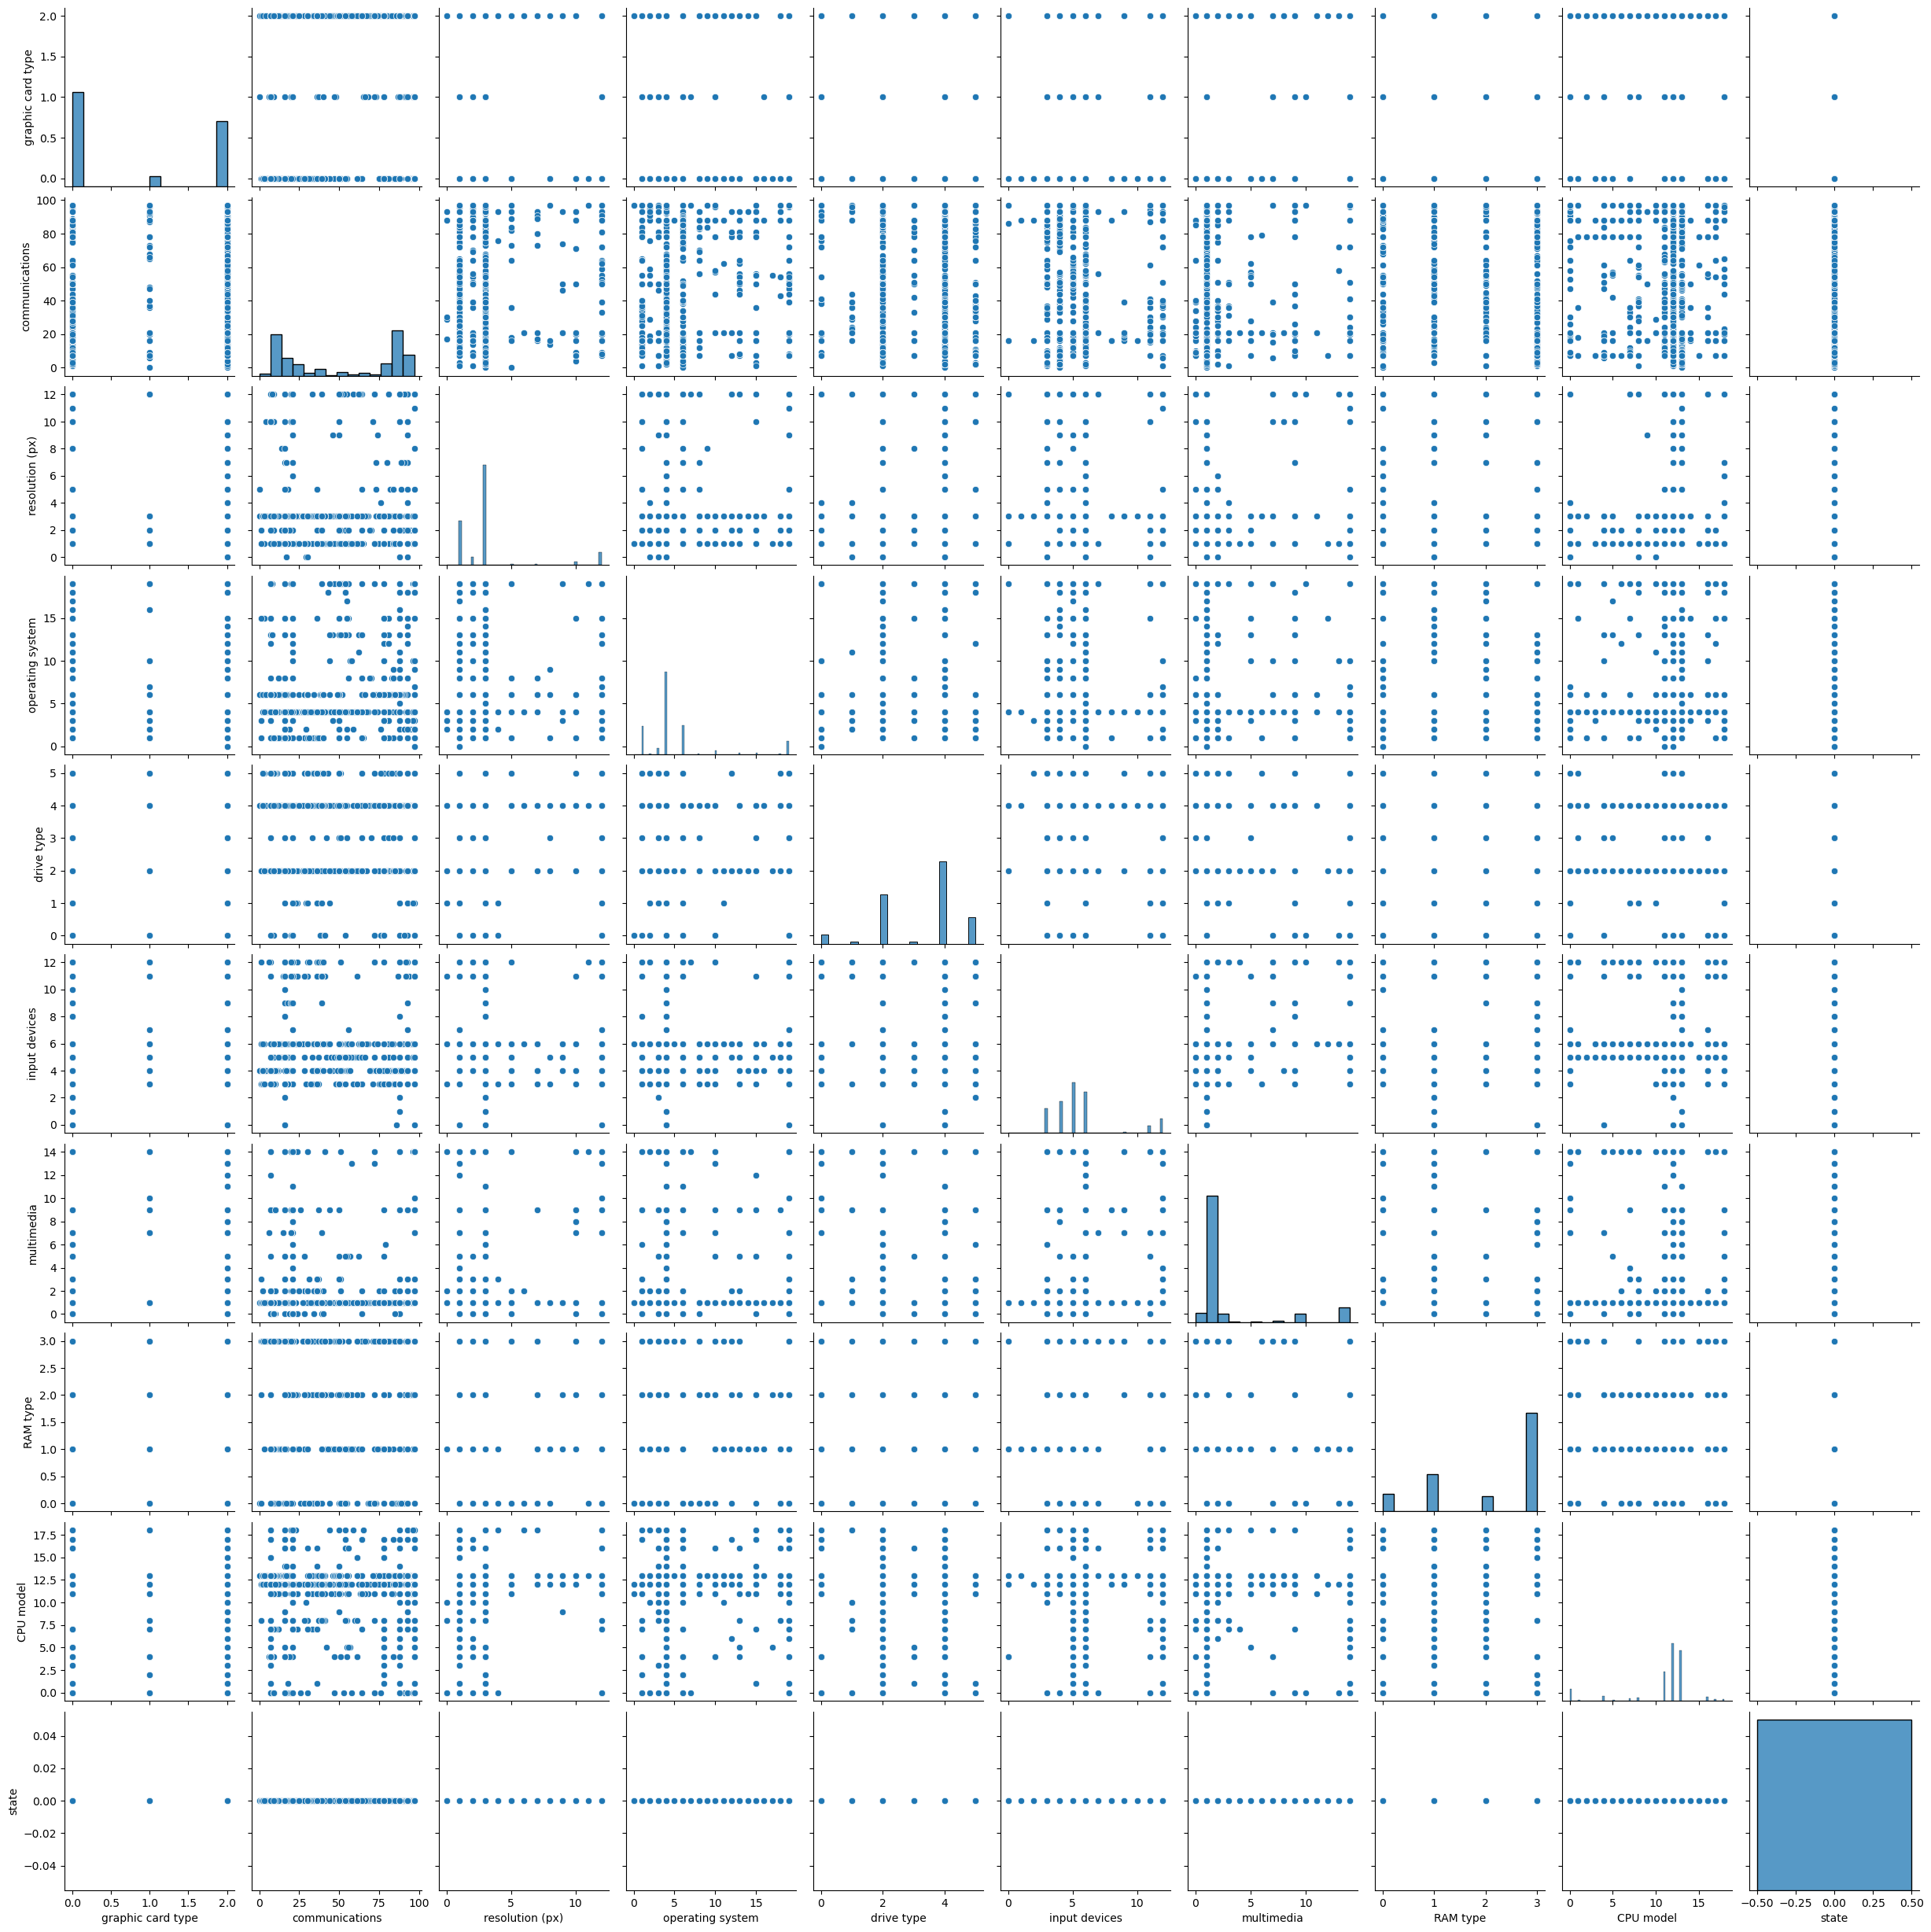

In [19]:
# visualize the train dataset
sns.pairplot(train[features])

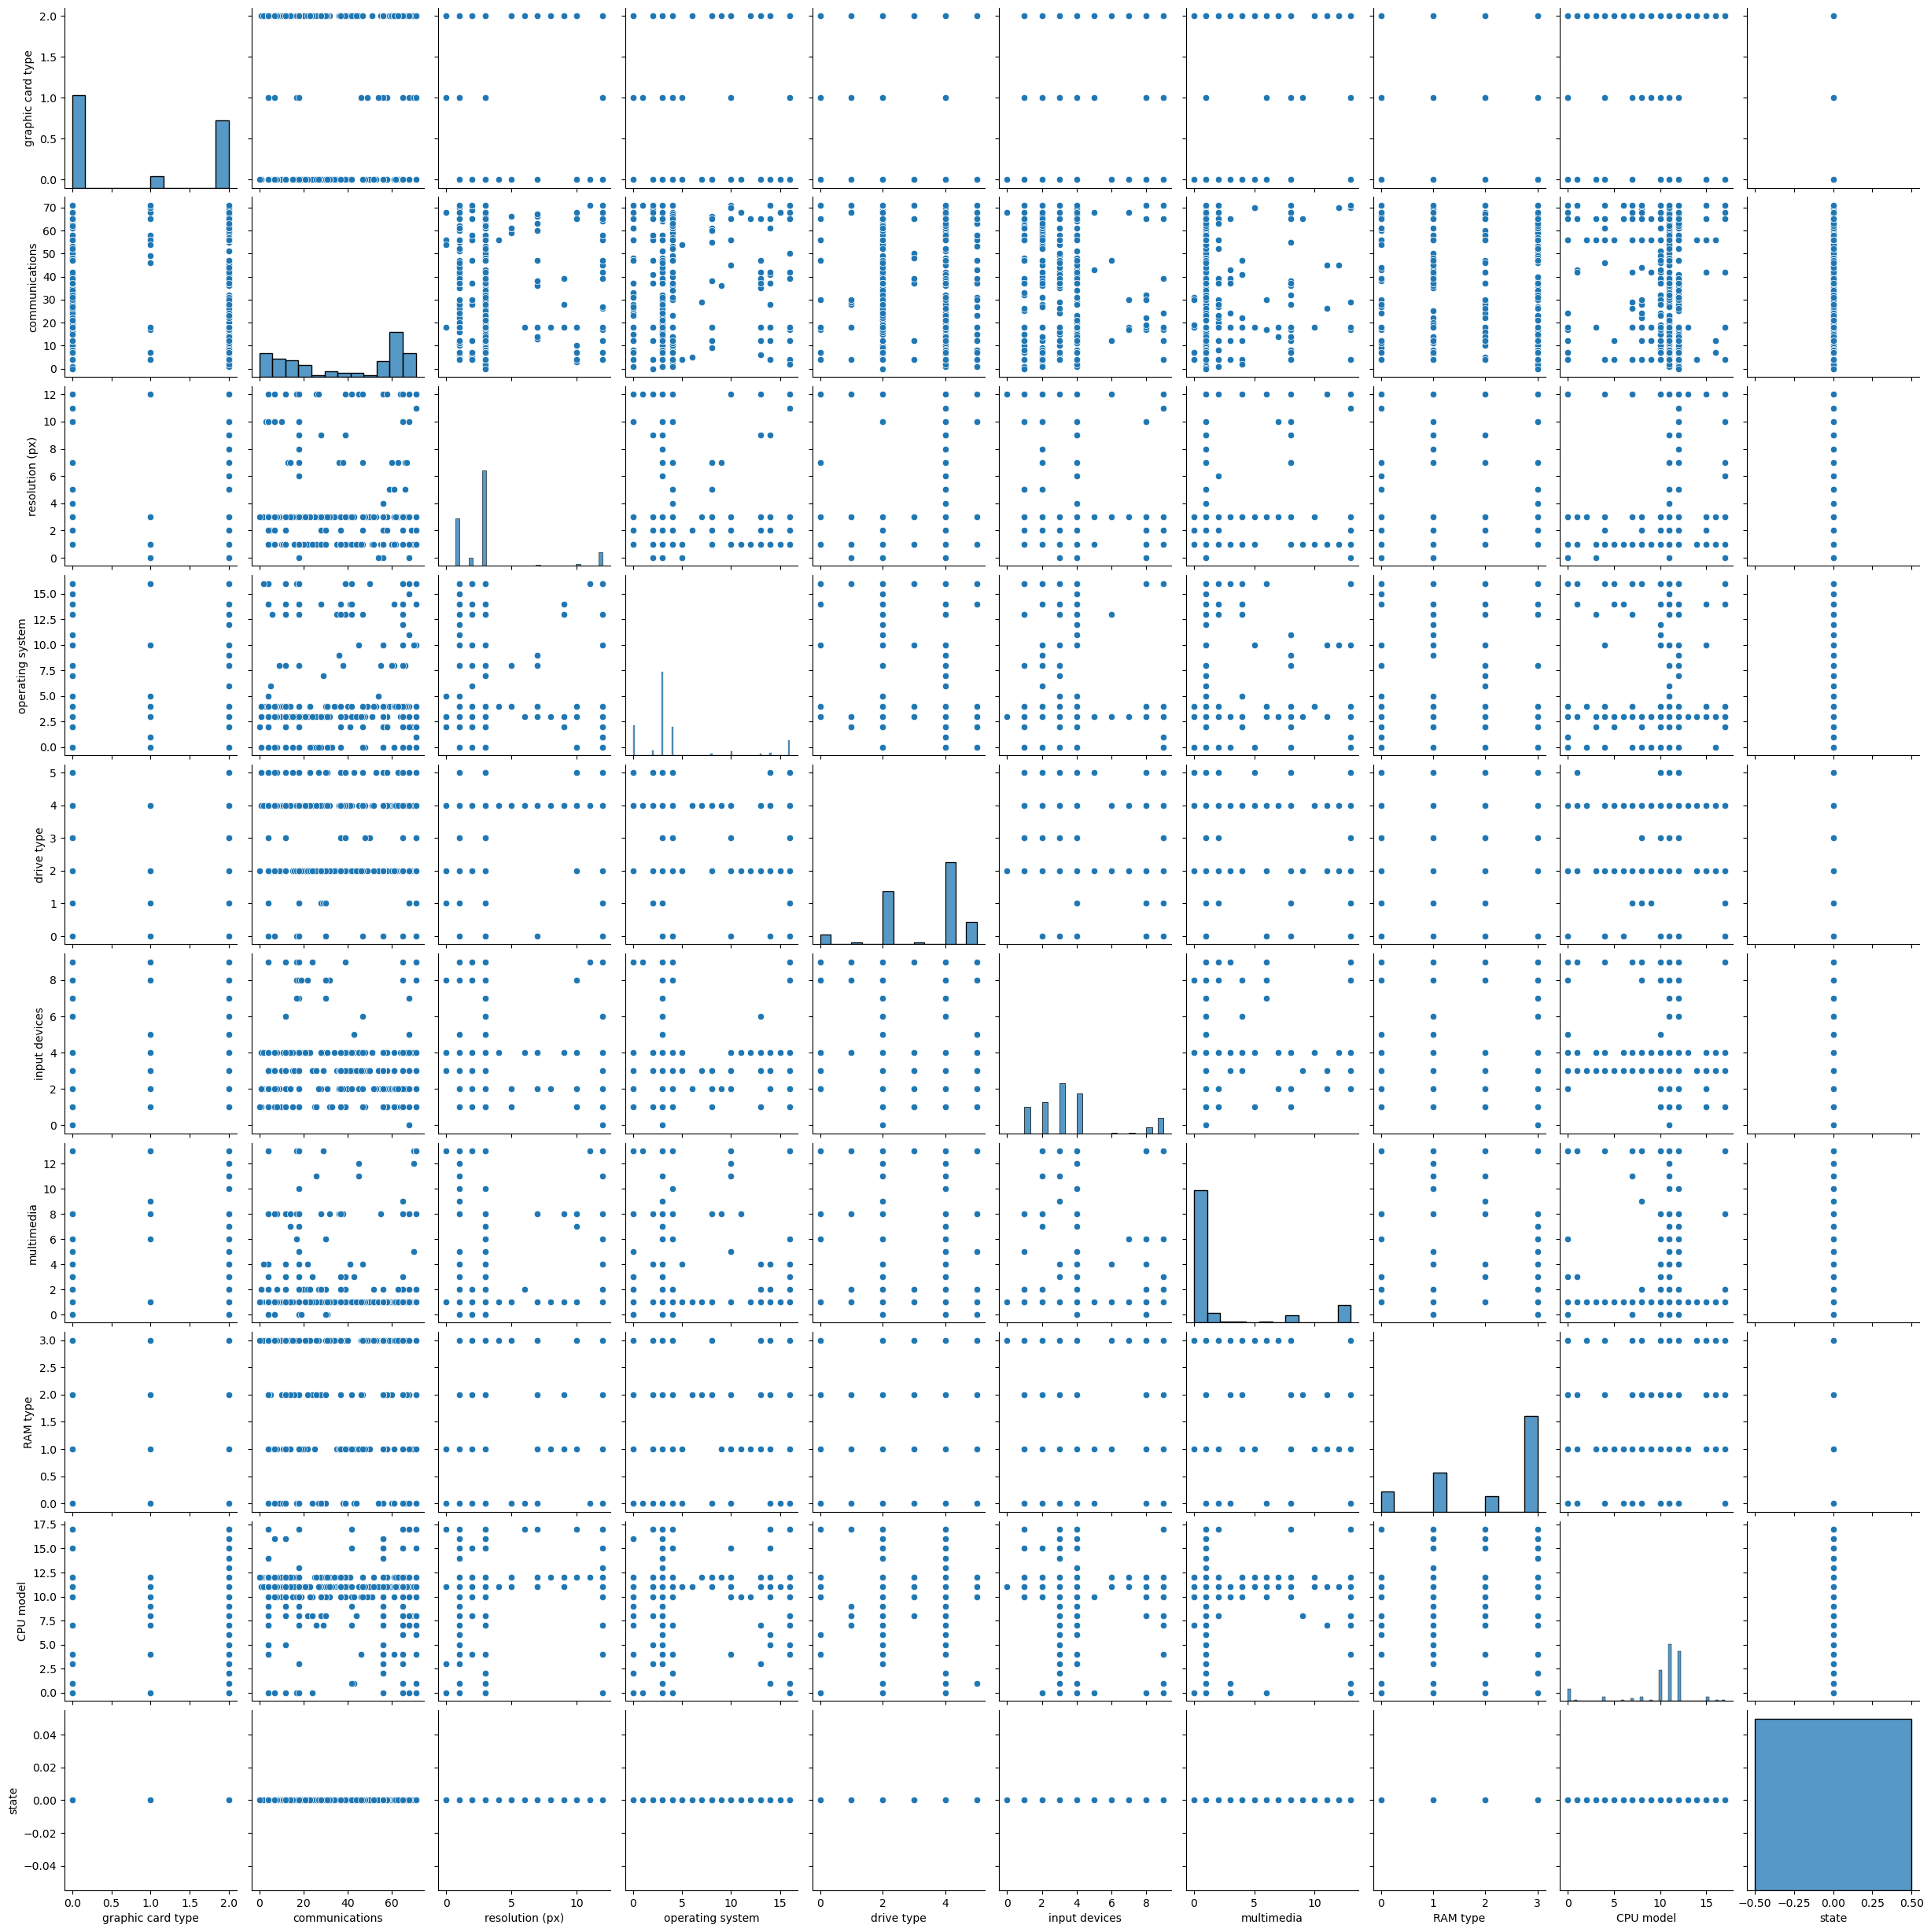

In [20]:
# visualize the test dataset
sns.pairplot(test[features])

<Axes: xlabel='RAM type', ylabel='Count'>

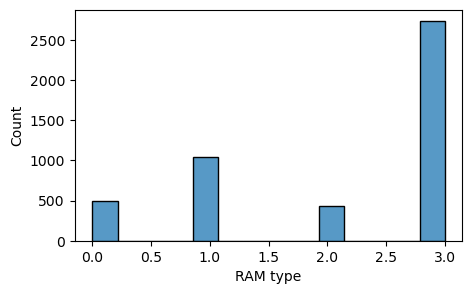

In [23]:
# plt the histogram for RAM type in train set
plt.figure(figsize=(5,3))
sns.histplot(train['RAM type'])

<Axes: xlabel='RAM type', ylabel='Count'>

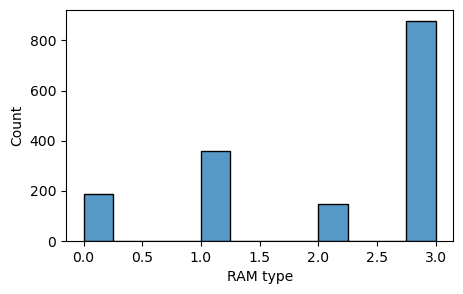

In [24]:
# plot the histogram for Ram type in Test set
plt.figure(figsize=(5,3))
sns.histplot(test['RAM type'])

C:\Users\daksh\AppData\Local\Temp\ipykernel_19260\1726672923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

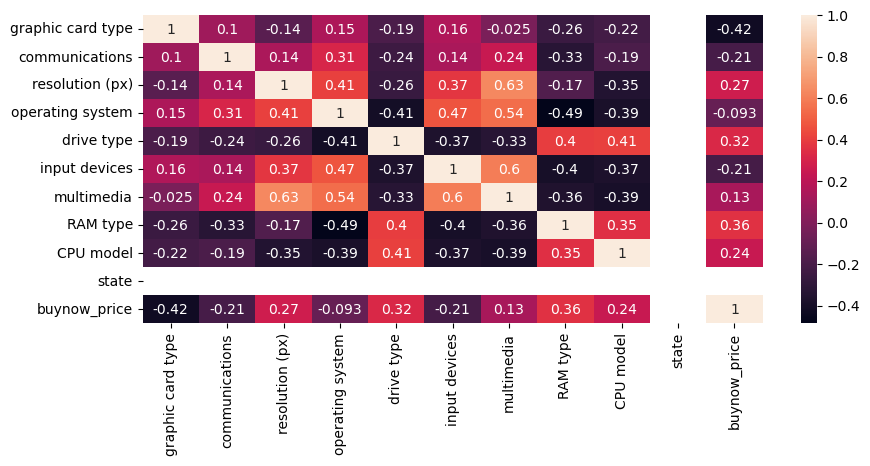

In [25]:
# check the correlation using Heat map
corr = train.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True)

In [26]:
# check the most correlated columns 
corr['buynow_price']

graphic card type   -0.422803
communications      -0.212651
resolution (px)      0.273450
operating system    -0.092970
drive type           0.324318
input devices       -0.213429
multimedia           0.132621
RAM type             0.357945
CPU model            0.241833
state                     NaN
buynow_price         1.000000
Name: buynow_price, dtype: float64

<Axes: xlabel='buynow_price', ylabel='Count'>

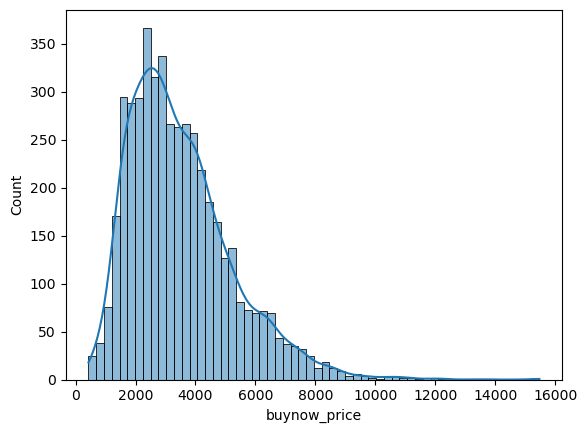

In [27]:
# visualize the buynow price
sns.histplot(train['buynow_price'], kde=True)

<Axes: >

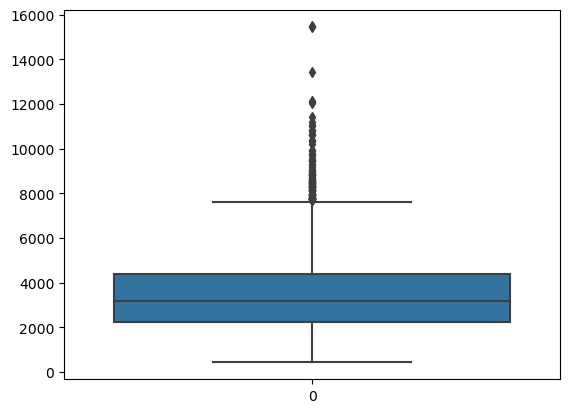

In [28]:
# visualize the box plot for predicted variable
sns.boxplot(train['buynow_price'])

In [29]:
# identify the outliers
q1 = train['buynow_price'].quantile(0.25)
q3 = train['buynow_price'].quantile(0.75)
iqr = q3-q1
iqr

# drop the outliers
lower = q1-1.5*iqr
upper = q3+1.5*iqr

train = train[(train['buynow_price'] >= lower) & (train['buynow_price'] <= upper)]

In [30]:
# Identify columns with string values
string_columns = train.select_dtypes(include=['object']).columns
string_columns_test = test.select_dtypes(include=['object']).columns
for col in string_columns:
    if train[col].dtype == 'object':
        train[col] = train[col].astype('category').cat.codes

for col in string_columns_test:
    if test[col].dtype == 'object':
        test[col] = test[col].astype('category').cat.codes

In [31]:
# Handle missing values
train = train.replace('not applicable', pd.NA)
test = test.replace('not applicable', pd.NA)

In [32]:
# Convert data to numeric
train = train.astype(float)
test = test.astype(float)

## Split the data into train and test

In [33]:
# split the data into X_train and y_train
X_train = train.drop(columns=['buynow_price'])
y_train = train['buynow_price']

# split the data into X_test and y_test
X_test = test.drop(columns=['buynow_price'])
y_test = test['buynow_price']

In [34]:
# check the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4599, 16), (4599,), (1571, 16), (1571,))

## Standardization :

In [35]:
# import the library
from sklearn.preprocessing import StandardScaler

# initialize the Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Building :

In [38]:
# import the random forest library
from sklearn.ensemble import RandomForestRegressor

# evaluate the model
rfr = RandomForestRegressor(n_estimators=150, random_state=42)
# fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

## Predictions :

In [40]:
# predict the test set
y_pred = rfr.predict(X_test)

In [41]:
# import evaluation metrix for regression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# find the metrix values
print('MSE score :', mean_squared_error(y_test, y_pred))
print('RMSE score :', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score :', r2_score(y_test, y_pred))

MSE score : 748486.7068353213
RMSE score : 865.1512624017382
R2 score : 0.7586261006192418


## Hyperparameter Tuning using GridSearchCV:

In [42]:
# import grid search cv library
from sklearn.model_selection import GridSearchCV

# define the parameters grid
parameters = {'n_estimators': [10, 20, 30],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
gs = GridSearchCV(estimator=rfr,
                  param_grid=parameters,
                  cv=5,
                  scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [44]:
# find the best parameters
best_params = gs.best_params_
print('Best Parameters :', best_params)

Best Parameters : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}


In [45]:
best_rfr = gs.best_estimator_
best_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [47]:
# predict the test set
y_pred = best_rfr.predict(X_test)

## Predictions :

In [48]:
# print the Evaluation metrix score
print('R2 Score :', r2_score(y_test, y_pred))
print('RMSE Score :', sqrt(mean_squared_error(y_test, y_pred)))
print('MSE Score :', mean_squared_error(y_test, y_pred))

R2 Score : 0.7569765627392497
RMSE Score : 868.1024304764771
MSE Score : 753601.8297991668


## Conclusion :

The model performs good fit with R2 score of 0.7569, indicating approximately 76% of the variance in the target variable is explained by the model.

However, RMSE is 868.10 suggest that there is still a average error in the predictions.

The R2 score is little bit more on before implement the Hyperparameter tuning with 0.7586, approximately 76% same. Its getting similar predictions on model before and after done the hyperparameter tuning.

## Thank you !!!